In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [3]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2019-07-10 05:57:57--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.125.128, 2404:6800:4008:c04::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2019-07-10 05:57:58 (95.6 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [5]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1)) # Your Embedding Layer
model.add(Bidirectional(LSTM(150, return_sequences = True)))            # An LSTM Layer
model.add(Dropout(0.2))  # A dropout layer
model.add(LSTM(100))     # Another LSTM Layer
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))# A Dense Layer including regularizers
model.add(Dense(total_words, activation='softmax'))# A Dense Layer

# Pick a loss function and an optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 10, 100)           321100    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 10, 300)           301200    
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 300)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_2 (Dense)              (None, 1605)              162105    
_________________________________________________________________
dense_3 (Dense)              (None, 3211)              5156866   
Total params: 6,101,671
Trainable params: 6,101,671
Non-trainable params: 0
____________________________________________

In [6]:
 history = model.fit(predictors, label, epochs= 100, verbose=1)

W0710 05:59:17.852041 140463594178432 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100
15462/15462 [==============================] - 63s 4ms/sample - loss: 6.9025 - acc: 0.0204
Epoch 2/100
15462/15462 [==============================] - 61s 4ms/sample - loss: 6.4970 - acc: 0.0227
Epoch 3/100
15462/15462 [==============================] - 61s 4ms/sample - loss: 6.3921 - acc: 0.0266
Epoch 4/100
15462/15462 [==============================] - 60s 4ms/sample - loss: 6.2690 - acc: 0.0282
Epoch 5/100
15462/15462 [==============================] - 60s 4ms/sample - loss: 6.1746 - acc: 0.0322
Epoch 6/100
15462/15462 [==============================] - 60s 4ms/sample - loss: 6.0863 - acc: 0.0380
Epoch 7/100
15462/15462 [==============================] - 60s 4ms/sample - loss: 6.0025 - acc: 0.0383
Epoch 8/100
15462/15462 [==============================] - 60s 4ms/sample - loss: 5.9226 - acc: 0.0435
Epoch 9/100
15462/15462 [==============================] - 60s 4ms/sample - loss: 5.8322 - acc: 0.0460
Epoch 10/100
15462/15462 [==============================] - 60s 4ms/sampl

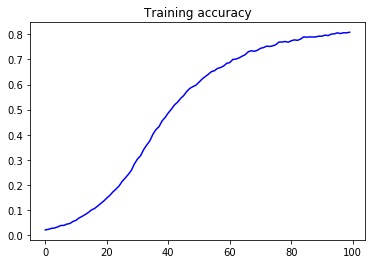

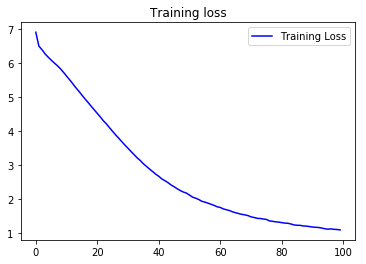

In [7]:
import matplotlib.pyplot as plt
acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [8]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
  
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
      
	seed_text += " " + output_word
  
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope with nature's music staineth staineth mother mad decrease parts away away away thee young away bright still seem such more bright new strong small mind thus each state new cold cold torn torn taken acquainted brought to give ride flow gone away away away thee so should your rhyme shall tend tend brought to light wrong faith torn torn torn making defaced place dearly wrong night care there delight lives common stand cold shade away away his loss away out care her blushing stand mother mother open painted perceived night new wrong night young sight quite stand sang of hide
